In [128]:
# import libraries
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import coint

In [44]:
# import csv file containing information of all stocks from tech industry
tech_industry = pd.read_csv('tech-industry.csv')

In [45]:
# display first 5 elements
tech_industry.head()

,Symbol,Name,Last,Change,%Chg,Open,High,Low,Volume,Time
0,AAPL,Apple Inc,127.90,1.69,+1.34%,125.83,127.92,125.14,83466703.0,04/07/21
1,AMD,Adv Micro Devices,82.20,0.76,+0.93%,81.32,83.10,80.35,35590898.0,04/07/21
2,MSFT,Microsoft Corp,249.90,2.04,+0.82%,247.81,250.93,247.19,22719801.0,04/07/21
3,INTC,Intel Corp,66.25,0.69,+1.05%,65.67,66.57,65.36,17793201.0,04/07/21
4,MU,Micron Technology,93.96,0.47,+0.50%,94.25,95.07,92.54,17621400.0,04/07/21


In [46]:
# sort tech stocks by trading volume
tech_industry = tech_industry.sort_values(by='Volume', ascending=False)

# top 10 tech stocks with most trading value
tech_industry = tech_industry[:10]

# display the dataframe
display(tech_industry)

,Symbol,Name,Last,Change,%Chg,Open,High,Low,Volume,Time
0,AAPL,Apple Inc,127.90,1.69,+1.34%,125.83,127.92,125.14,83466703.0,04/07/21
1,AMD,Adv Micro Devices,82.20,0.76,+0.93%,81.32,83.10,80.35,35590898.0,04/07/21
2,MSFT,Microsoft Corp,249.90,2.04,+0.82%,247.81,250.93,247.19,22719801.0,04/07/21
3,INTC,Intel Corp,66.25,0.69,+1.05%,65.67,66.57,65.36,17793201.0,04/07/21
4,MU,Micron Technology,93.96,0.47,+0.50%,94.25,95.07,92.54,17621400.0,04/07/21
5,CSCO,Cisco Systems Inc,51.77,-0.26,-0.49%,52.01,52.14,51.58,15783601.0,04/07/21
6,AMAT,Applied Materials,139.14,-0.40,-0.29%,140.25,141.87,136.82,13702699.0,04/07/21
7,ORCL,Oracle Corp,74.07,-0.21,-0.28%,73.60,74.18,73.45,12356700.0,04/07/21
8,PYPL,Paypal Holdings,255.60,2.41,+0.95%,253.07,259.22,251.07,7243200.0,04/07/21
9,HPE,Hewlett Packard Enterprise Comp,15.90,-0.02,-0.13%,15.90,16.02,15.78,7077000.0,04/07/21


In [47]:
# get stock tickers of these 10 stocks as tickers list
tickers = tech_industry.Symbol.values.tolist()

# display list of tickers
display(tickers)

['AAPL', 'AMD', 'MSFT', 'INTC', 'MU', 'CSCO', 'AMAT', 'ORCL', 'PYPL', 'HPE']

In [48]:
# fetch stock price data for each of the tickers from yahoo finance
# for the period 2016 to 2020 and save as separate csv files

for ticker in tickers:
    df =  pdr.get_data_yahoo(symbols=ticker, start = datetime(2016, 1, 1), end = datetime(2020, 1, 1))
    df.to_csv(ticker+'.csv') 

In [49]:
# read apple stock price csv to verify if data has been collected correctly
aapl = pd.read_csv('AAPL.csv')

In [50]:
# display first 5 
aapl.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-12-31,26.757500,26.205000,26.752501,26.315001,163649200.0,24.343718
1,2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.364536
2,2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.753977
3,2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.289116
4,2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.306208


In [51]:
# display last 5 rows
aapl.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1002,2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.353882
1003,2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.749733
1004,2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.722488
1005,2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,72.148178
1006,2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.675339


In [52]:
# Success! Data has been fetched correctly. Now we will clean the data as per our requirements
# We only need Date and Adj Close column values for each of the stocks
# We choose Adj Close over just the close price because the Adj Close 
# is normalized prices according to the individual stock's historical dividends, splits, etc.
# and hence, better quality price data than just the close price

In [53]:
# create new price dataframe
price = pd.DataFrame()

In [56]:
# for each of the ticker, add the corresponding adjusted close price to the combined price dataframe
for ticker in tickers:
    df = pd.read_csv(ticker+'.csv')
    price['date'] = df['Date']
    price[ticker+'_close'] = df['Adj Close']
    

In [65]:
# display combined price data frame first 5 values
display(price.head())

,date,AAPL_close,AMD_close,MSFT_close,INTC_close,MU_close,CSCO_close,AMAT_close,ORCL_close,PYPL_close,HPE_close
0,2015-12-31,24.343718,2.87,50.510929,29.935064,14.16,22.774519,17.321833,33.539711,36.200001,7.771190
1,2016-01-04,24.364536,2.77,49.891834,29.535355,14.33,22.318188,17.136276,32.958900,34.750000,7.735402
2,2016-01-05,23.753977,2.75,50.119446,29.396330,14.82,22.216778,17.154827,32.857491,34.310001,7.684277
3,2016-01-06,23.289116,2.51,49.209011,28.744617,14.22,21.980158,16.449711,33.023438,33.980000,7.566686
4,2016-01-07,22.306208,2.28,47.497398,27.667130,13.66,21.473118,15.967264,32.304333,33.130001,7.009409


In [61]:
# check if any values are missing
price.isnull().values.any()

False

In [62]:
# Awesome! We have succesfully combined the required data

In [66]:
# set date column as index
price = price.set_index('date')

In [109]:
price.shape

(1007, 10)

In [113]:
# Now we will split our dataset into train and test data
# we will use 2 years data as training and 2 years data as testing
# roughly splitting the dataset into 2 parts

In [114]:
train_data = price[:507]
train_data.shape

(507, 10)

In [115]:
# train data starting from 2015-12-31 to 2018-01-04 (507 values)

In [116]:
test_data = price[507:]
test_data.shape

(500, 10)

In [117]:
# test data starting from 2018-01-05 to 2019-12-31 (500 values)

In [118]:
# from this point on we will be working only with our training data intil we get to the testing phase

Text(0.5, 1.0, 'autocorrelation matrix')

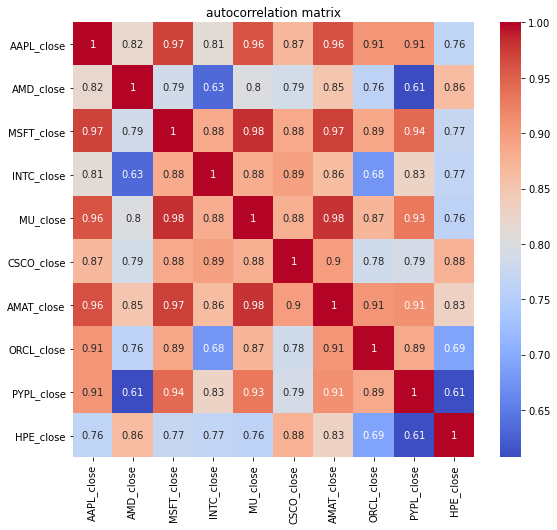

In [119]:
# plot correlation matrix of all pairs of stocks using training data
# using pearson method : standard correlation coefficient
fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(train_data.corr(method='pearson'), ax=ax, cmap='coolwarm', annot=True) 
ax.set_title('autocorrelation matrix')

In [121]:
# ranking all unique stock pairs based on correlation computed above (descending order) 
pair_ranks = train_data.corr(method='pearson').stack().sort_values(ascending=False).reset_index()
pair_ranks = pair_ranks[pair_ranks.level_0 < pair_ranks.level_1].reset_index().drop(columns='index')
pair_ranks = pair_ranks.rename(columns={'level_0': 'stock1', 'level_1': 'stock2'})

In [148]:
# display top 5 correlated pairs
pair_ranks.head()

,stock1,stock2,0
0,MSFT_close,MU_close,0.981962
1,AMAT_close,MU_close,0.980960
2,AMAT_close,MSFT_close,0.972609
3,AAPL_close,MSFT_close,0.971415
4,AAPL_close,AMAT_close,0.961919


In [ ]:
# Now we will test for cointegration

In [142]:
# function to find cointegrated pairs
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

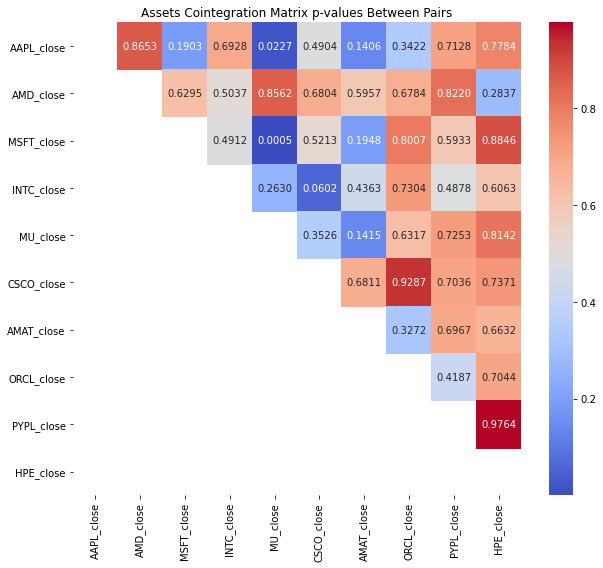

In [143]:
# plot the heatmap
fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(pvalues, xticklabels = train_data.columns, yticklabels = train_data.columns, 
            cmap = 'coolwarm', annot = True, fmt=".4f", mask = (pvalues >= 0.99))
ax.set_title('Assets Cointegration Matrix p-values Between Pairs')
plt.tight_layout()

In [145]:
# find best pairs based on cointegration
pvalues, pairs = find_cointegrated_pairs(train_data)

# display the pairs
display(pairs)

[('AAPL_close', 'MU_close'), ('MSFT_close', 'MU_close')]

In [146]:
# we notice that MSFT and MU pair is highly ranked on the basis of both correlation and cointegration test
# based on the statistical significance we will choose the MSFT and MU pair to develop our strategy moving forward

In [150]:
# chosen pair
stock1 = 'MSFT_close'
stock2 = 'MU_close'

In [151]:
# create a train dataframe of 2 assets
train = pd.DataFrame()
train['stock1'] = train_data[stock1]
train['stock2'] = train_data[stock2]

In [154]:
# display first 5 rows
train.head()

,stock1,stock2
date,,
2015-12-31,50.510929,14.16
2016-01-04,49.891834,14.33
2016-01-05,50.119446,14.82
2016-01-06,49.209011,14.22
2016-01-07,47.497398,13.66


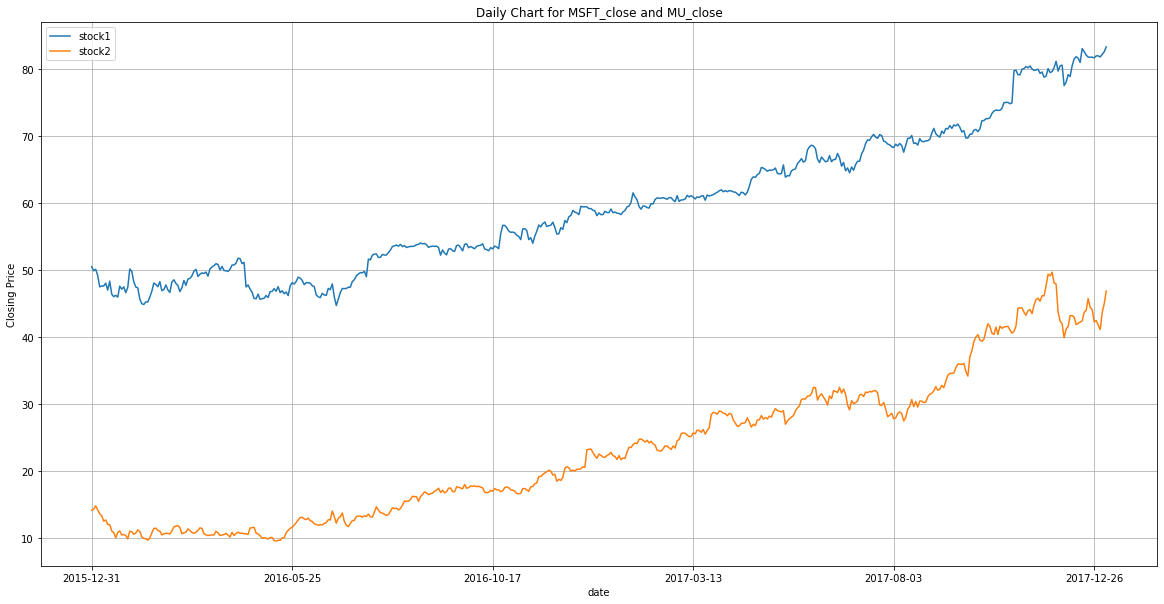

In [161]:
# visualize closing prices of both stocks from training data
ax = train[['stock1','stock2']].plot(figsize=(20, 10), title = 'Daily Chart for {} and {}'.format(stock1,stock2))
ax.set_ylabel("Closing Price")
ax.grid(True)